# Genetic algorithm

Now we have functions for fitness, crossover, mutation, and tournament selection. We can import these and use them in our genetic algorithm to search for the global optima of the fitness function. The objective is to find the global minimum of the Ackley function [0, 0].

## Exercise 1:

Provide written answers for the following questions:
- 1.1. Run the GA code using the default parameters and see if the GA finds the global minimum. How many generations does it take to converge?
- 1.2. How does using mutation alone (PROB_CROSSOVER = 0) and crossover alone (PROB_MUTATION = 0) influence the results? What about if you use a small or a large population size?
- 1.3. What happens if you use a larger magnitude mutation probability (PROB_MUTATION)?
- 1.4. What happens if the tournament size is small (minimal is 2) or large (TOURNAMENT_SIZE must still be less than POPULATION_SIZE)?
- 1.5. When the x and y value of each chromosome in the population is plotted, do you notice anything odd about it? Can you explain it? 
- 1.6. How does making ELITISM=True influence the results?

NOTE: Once you have completed the above exercises, complete the exercises in GA_param_search.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%run fitness.ipynb
%run selection.ipynb
%run crossover.ipynb
%run mutation.ipynb

## GA parameters

The user should first choose the GA parameters. IMPORTANT: The parameters we have set for you are by no means optimal (in fact, they are intentionally bad). You should try different values to see what happens. We will show you a more systematic way to aid the choice of parameters later but for now just change one parameter while keeping the others constant and see if you can observe a difference in the convergence to a solution.

It is often a good idea to keep track of the best solution thus far so that it is not lost. If elitism is chosen, then this best solution will always be added to the new population without being mutated so that future generations can continue to search this area of the solution space.

Generation 0
 --> Best: fitness(-0.02444, 0.96285) = 2.59918
 --> Mean: 9.60973 and SD: 2.52694


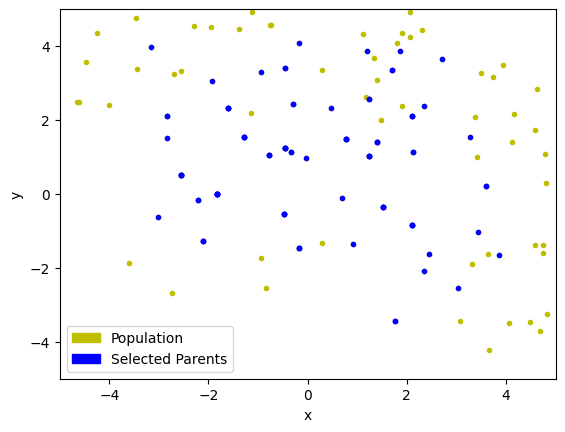

Generation 10
 --> Best: fitness(-0.01466, -0.01466) = 0.07007
 --> Mean: 2.86645 and SD: 3.33056


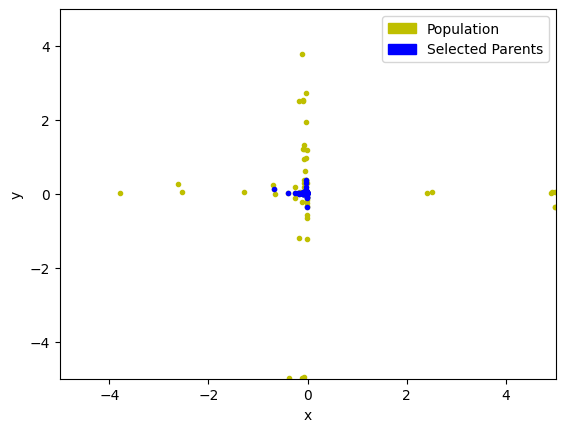

Generation 20
 --> Best: fitness(-0.00489, 0.00489) = 0.02082
 --> Mean: 2.96191 and SD: 3.61013


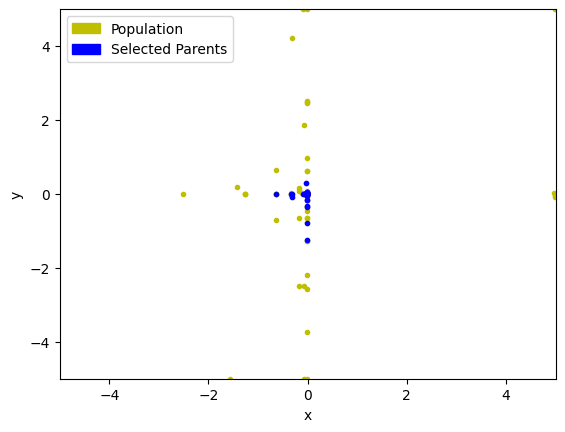

Generation 30
 --> Best: fitness(-0.00489, 0.00489) = 0.02082
 --> Mean: 2.38739 and SD: 3.37714


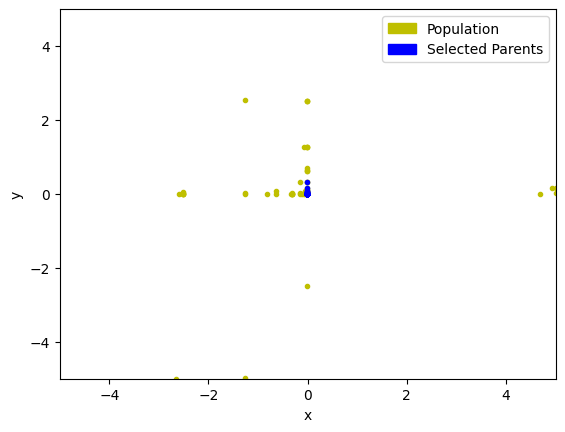

Generation 40
 --> Best: fitness(-0.00489, 0.00489) = 0.02082
 --> Mean: 2.0203 and SD: 3.0153


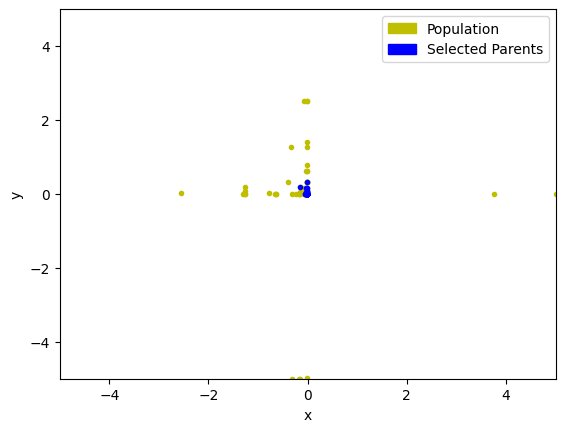

Generation 50
 --> Best: fitness(-0.00489, 0.00489) = 0.02082
 --> Mean: 2.31555 and SD: 3.25056


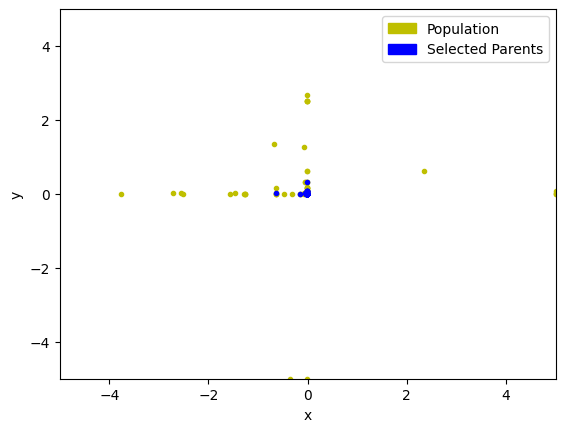

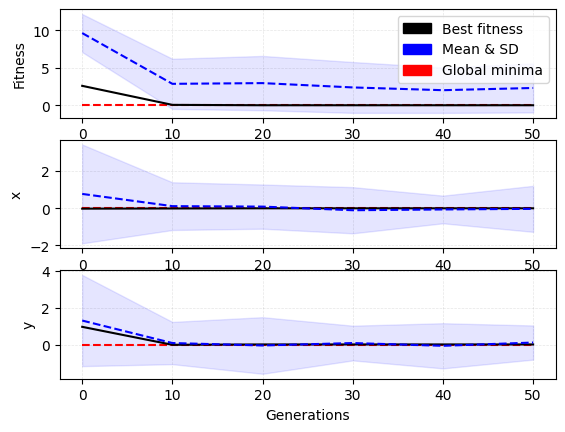

In [3]:
# GA parameters
NUM_GENERATIONS = 50
POPULATION_SIZE = 10
TOURNAMENT_SIZE = 5
PROB_MUTATION = 0.15
PROB_CROSSOVER = 0.5
STAT_INTERVALS = 10

# add the best chromosome in the current generation to the next generation
ELITISM = False

# initial population 
chromosome = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
population = np.empty((0, len(chromosome)))
for i in range(POPULATION_SIZE):
    random.shuffle(chromosome)
    population = np.vstack((population, chromosome))

# keep track of the best chromosome and it's fitness
best_chromosome = np.empty((0, len(chromosome)))
best_fitness = 100000
gen_stats = np.empty((0, 9))

# we will add the best individual to the population if ELITISM
POPULATION_SIZE = POPULATION_SIZE - 1 if ELITISM else POPULATION_SIZE

for i in range(NUM_GENERATIONS + 1):

    # evaluate the fitness for each chromosome in the current generation
    fitnesses = np.array([ackley(chrsm) for chrsm in population])

    # print information about the current generation
    if i % STAT_INTERVALS == 0:
        gen_best_idx = np.argmin(fitnesses[:, 2])
        gen_best_x, gen_best_y, gen_best_fit = fitnesses[gen_best_idx, 0], fitnesses[gen_best_idx, 1], fitnesses[
            gen_best_idx, 2]
        gen_mean_fit, gen_std_fit = np.mean(fitnesses[:, 2]), np.std(fitnesses[:, 2])
        gen_mean_x, gen_std_x, gen_mean_y, gen_std_y = np.mean(fitnesses[:, 0]), np.std(fitnesses[:, 0]), np.mean(
            fitnesses[:, 1]), np.std(fitnesses[:, 1])
        gen_stats = np.append(gen_stats, [[gen_best_fit, gen_mean_fit, gen_std_fit,
                                           gen_best_x, gen_mean_x, gen_std_x,
                                           gen_best_y, gen_mean_y, gen_std_y]], axis=0)
        print(f"Generation {i}")
        print(f" --> Best: fitness({round(gen_best_x, 5)}, {round(gen_best_y, 5)}) = {round(gen_best_fit, 5)}")
        print(f" --> Mean: {round(gen_mean_fit, 5)} and SD: {round(gen_std_fit, 5)}")

    next_gen = np.empty((0, len(chromosome)))
    collect_parents = np.empty((0, len(chromosome)))
    
    while len(next_gen) < POPULATION_SIZE:
        # select parent chromosomes
        parent_1 = tournament_selection(population, fitnesses[:, 2], TOURNAMENT_SIZE)
        parent_2 = tournament_selection(population, fitnesses[:, 2], TOURNAMENT_SIZE)
        collect_parents = np.vstack((collect_parents, parent_1))
        collect_parents = np.vstack((collect_parents, parent_2))
        # make child chromosomes using 2-point crossover
        children = crossover(parent_1, parent_2, PROB_CROSSOVER)
        # add children to the next generation
        next_gen = np.vstack((next_gen, children[0]))
        if len(next_gen) >= POPULATION_SIZE: break
        next_gen = np.vstack((next_gen, children[1]))

    # mutate genes in the next generation
    next_gen = mutation(next_gen, PROB_MUTATION)

    if ELITISM:
        if gen_best_fit < best_fitness:
            best_fitness = gen_best_fit
            best_chromosome = population[gen_best_idx]
        # add the best chromosome to the next generation without mutation
        next_gen = np.vstack((next_gen, best_chromosome))
    
    population = next_gen.copy()
    
    # plot current population and parents
    if i % STAT_INTERVALS == 0:
        plt.plot(fitnesses[:,0], fitnesses[:,1], '.y')
        par_fitnesses = np.array([ackley(chrsm) for chrsm in collect_parents])
        plt.plot(par_fitnesses[:,0], par_fitnesses[:,1], '.b')
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
        plt.xlabel("x")
        plt.ylabel("y")
        y_patch = mpatches.Patch(color='y', hatch=".", label='Population')
        b_patch = mpatches.Patch(color='b', hatch=".", label='Selected Parents')
        plt.legend(handles=[y_patch, b_patch])
        plt.pause(0.1)
        plt.close()

    plt.show()

# plot GA statistics 
fig, axs = plt.subplots(3)

x_axis_range = list(range(0, gen_stats.shape[0] * STAT_INTERVALS, STAT_INTERVALS))

axs[0].plot(x_axis_range, np.zeros(len(x_axis_range)), '--r', linewidth=1.5)
axs[0].plot(x_axis_range, gen_stats[:, 0], '-k', linewidth=1.5)
axs[0].plot(x_axis_range, gen_stats[:, 1], '--b', linewidth=1.5)
axs[0].fill_between(x_axis_range, gen_stats[:, 1] - gen_stats[:, 2], gen_stats[:, 1] + gen_stats[:, 2], color='b',
                    alpha=0.1)

axs[1].plot(x_axis_range, np.zeros(len(x_axis_range)), '--r', linewidth=1.5)
axs[1].plot(x_axis_range, gen_stats[:, 3], '-k', linewidth=1.5)
axs[1].plot(x_axis_range, gen_stats[:, 4], '--b', linewidth=1.5)
axs[1].fill_between(x_axis_range, gen_stats[:, 4] - gen_stats[:, 5], gen_stats[:, 4] + gen_stats[:, 5], color='b',
                    alpha=0.1)

axs[2].plot(x_axis_range, np.zeros(len(x_axis_range)), '--r', linewidth=1.5)
axs[2].plot(x_axis_range, gen_stats[:, 6], '-k', linewidth=1.5)
axs[2].plot(x_axis_range, gen_stats[:, 7], '--b', linewidth=1.5)
axs[2].fill_between(x_axis_range, gen_stats[:, 7] - gen_stats[:, 8], gen_stats[:, 7] + gen_stats[:, 8], color='b',
                    alpha=0.1)

axs[0].set_ylabel("Fitness")
axs[1].set_ylabel("x")
axs[2].set_ylabel("y")
axs[2].set_xlabel("Generations")

axs[0].legend(handles=[mpatches.Patch(color='k', label=f"Best fitness"),
                       mpatches.Patch(color='b', label=f"Mean & SD"),
                       mpatches.Patch(color='r', label=f"Global minima")])

axs[0].grid(color='k', linestyle='--', linewidth=0.5, alpha=0.1)
axs[1].grid(color='k', linestyle='--', linewidth=0.5, alpha=0.1)
axs[2].grid(color='k', linestyle='--', linewidth=0.5, alpha=0.1)

# axs[0].set_ylim([-0.5,14])
# axs[1].set_ylim([-5,5])
# axs[2].set_ylim([-5,5])

plt.show()

## Fitness function global minimum
Remember that the Ackley fitness function has a global minimum:
f(0.0, 0.0) = 0.0